In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/0700log-try/ua_numerical_done.csv


In [11]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC


先试试req_src

In [9]:
df = pd.read_csv("/kaggle/input/0700log-try/ua_numerical_done.csv", index_col = 0)
df.head(21)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,IP,timestamp,request_type,request_source,request_ver,status,bytes,referer,UA_br,UA_br_ver_major,UA_br_ver_minor,UA_br_ver_batch,UA_os,UA_dev,UA_is_pc,UA_is_tablet,UA_is_mobile,UA_is_bot,label,attack_type
0,2641840194,1.534721e+09,0,/,2,200,11357,-,40,68.0,0.0,3440,10,292,1,0,0,0,0,0
1,2641840194,1.534721e+09,0,/twitter-icon.png,2,200,27787,http://www.secrepo.com/,40,68.0,0.0,3440,10,292,1,0,0,0,0,0
2,2641840194,1.534721e+09,0,/GitHub-Mark.png,2,200,7428,http://www.secrepo.com/,40,68.0,0.0,3440,10,292,1,0,0,0,0,0
3,2641840194,1.534721e+09,0,/bootstrap/img/favicon.ico,2,200,590,http://www.secrepo.com/,40,68.0,0.0,3440,10,292,1,0,0,0,0,0
4,1907089584,1.534721e+09,0,/honeypot/Honeypot%20-%20Howto.pdf,2,200,46720,-,76,3.0,6.0,NaN,13,359,0,0,0,0,0,0
5,2057704543,1.534722e+09,0,/self.logs/,2,200,11681,http://www.secrepo.com/,40,68.0,0.0,3440,19,359,1,0,0,0,0,0
6,2057704543,1.534722e+09,0,/favicon.ico,2,200,267,http://www.secrepo.com/self.logs/,40,68.0,0.0,3440,19,359,1,0,0,0,0,0
7,2057704543,1.534722e+09,0,/self.logs/access.log.2017-01-02.gz,2,200,26823,http://www.secrepo.com/self.logs/,40,68.0,0.0,3440,19,359,1,0,0,0,1,9
8,3546799301,1.534722e+09,0,/favicon.ico,2,200,268,-,212,1.0,0.0,NaN,19,359,1,0,0,0,0,0
9,2057704543,1.534722e+09,0,/,2,200,11357,-,192,11.0,1.0,2,10,292,1,0,0,0,0,0


In [10]:
# 多分类
X_train, X_test, y_train, y_test = train_test_split(df['request_source'], df['attack_type'],test_size=0.2, random_state = 0)

In [12]:
# model
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

In [14]:
y_pred = text_clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    122079
           1       0.92      0.68      0.78       142
           2       0.76      1.00      0.86        35
           3       0.00      0.00      0.00         1
           4       0.74      0.07      0.12      1158
           5       0.00      0.00      0.00        21
           6       0.92      1.00      0.96       255
           7       0.88      0.85      0.86        86
           8       0.87      0.83      0.85       274
           9       0.93      1.00      0.96     37910
          10       1.00      0.03      0.07        89
          11       0.99      1.00      0.99      9864

    accuracy                           0.98    171914
   macro avg       0.75      0.62      0.62    171914
weighted avg       0.98      0.98      0.97    171914



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9766369766124936, 0.9772560698954128, 0.9744913471629936, None)

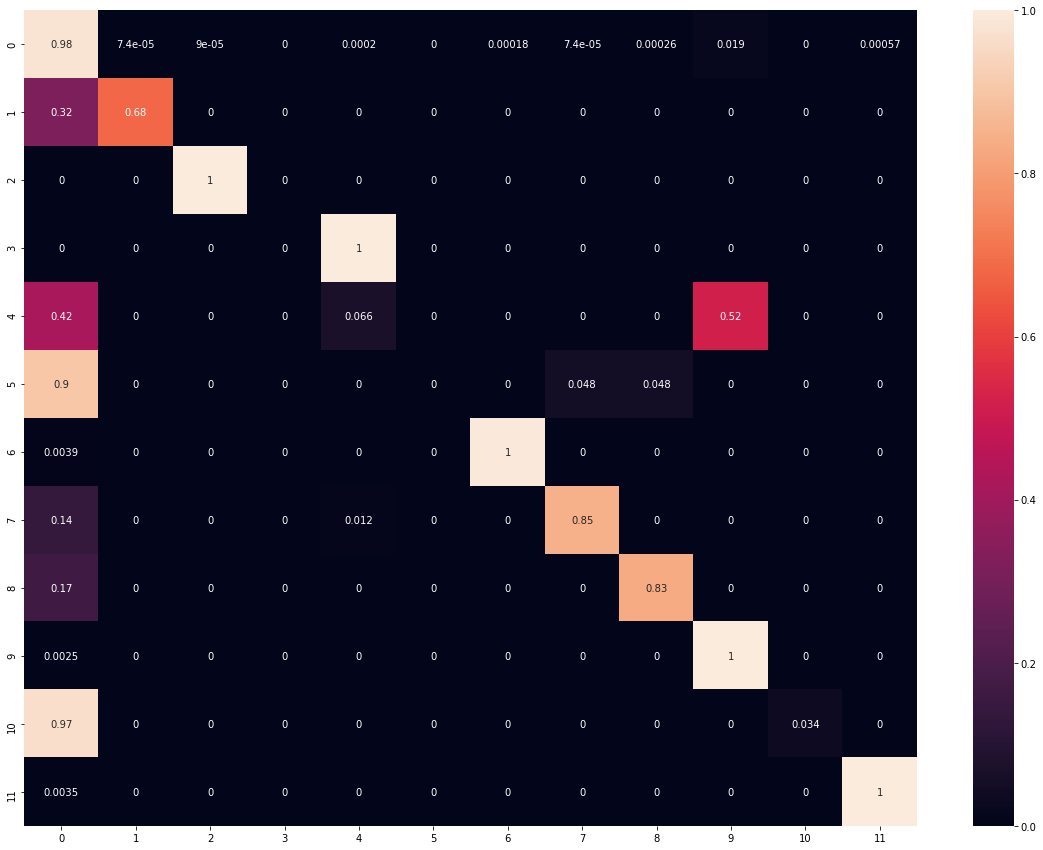

In [16]:
# Confusion Matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

array = confusion_matrix(y_test, y_pred)
cm = np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [17]:
# 二分类
X_train, X_test, y_train, y_test = train_test_split(df['request_source'], df['label'],test_size=0.2, random_state = 0)

In [18]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

0.717844374037148
0.991110665195144
0.8326295294206892
[[102665  19414]
 [   443  49392]]


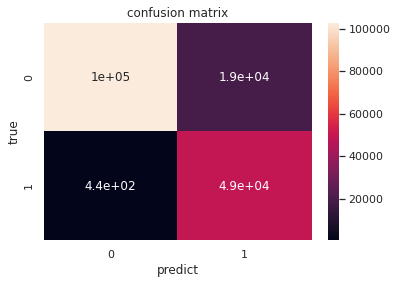

In [20]:
# validation
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def draw_cm(y_test, y_predict):
    sns.set()
    f,ax=plt.subplots()
    C1= confusion_matrix(y_test, y_predict, labels = [0, 1])
    print(C1)
    sns.heatmap(C1,annot=True,ax=ax) # hot plot display

    ax.set_title('confusion matrix') 
    ax.set_xlabel('predict')
    ax.set_ylabel('true')
    
draw_cm(y_test, y_pred)

这里尝试referer

In [25]:
# 多分类

v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
x = v.fit_transform(df['referer'].values.astype('U'))  ## Even astype(str) would work

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['request_source'], df['attack_type'],test_size=0.2, random_state = 0)

In [31]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

y_pred = text_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    122079
           1       0.92      0.68      0.78       142
           2       0.76      1.00      0.86        35
           3       0.00      0.00      0.00         1
           4       0.74      0.07      0.12      1158
           5       0.00      0.00      0.00        21
           6       0.92      1.00      0.96       255
           7       0.88      0.85      0.86        86
           8       0.87      0.83      0.85       274
           9       0.93      1.00      0.96     37910
          10       1.00      0.03      0.07        89
          11       0.99      1.00      0.99      9864

    accuracy                           0.98    171914
   macro avg       0.75      0.62      0.62    171914
weighted avg       0.98      0.98      0.97    171914



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


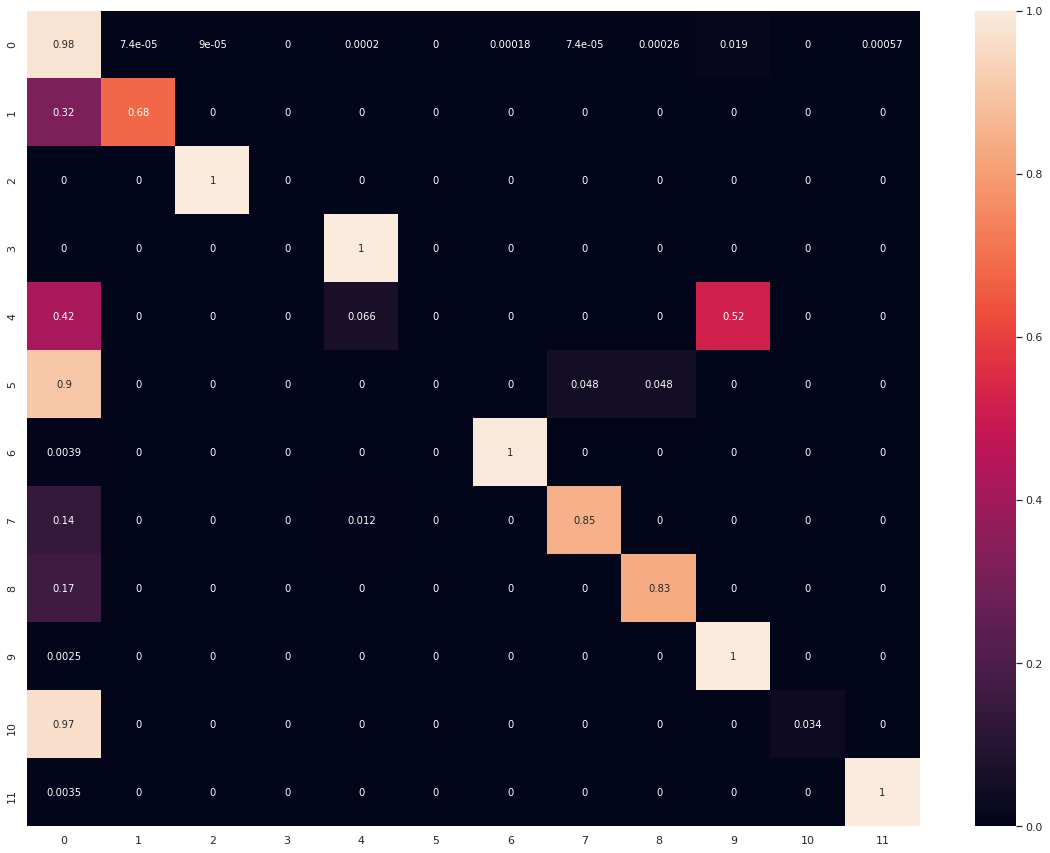

In [33]:
# Confusion Matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

array = confusion_matrix(y_test, y_pred)
cm = np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [ ]:
# 为啥最后一幅图出不来呢
print("?")